# First order conditions and macro models

## Perturbation of Neoclassical Growth model and Blanchard-Kahn conditions


A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$.

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.


__Compute the first order conditions and the steady-state__

__We'll assume the decision rule is $k_{t+1} = \varphi(k_t)$ where $\varphi$ is a function to be determined. What is the functional equation satisfied by $\varphi$?__

__At the steady-state $\overline{k} = \varphi(\overline{k})$. We want to characterize the first order coefficient: $\varphi_0$ such that $\varphi(k) = \overline{k} + \varphi_0 (k-\overline{k}) + o(k-\overline{k})$. Show that $\varphi_0$ satisfies a second order equation.__

__Find the roots of these equations and discuss stability ($|\varphi_0|<1$) and unicity. By definition, a linear model satisfies the "Blanchard-Kahn" condition if there is a unique stable solution.__

## RBC and Business Cycles

In [ ]:
]add DBnomics
]dev Dolo # use master version of Dolo

__Using US data until 2007, measure the business cycle covariances between investment, consumption, production. DBNomics.jl can be used to download data. Data should be detrended using the HP filter.__

gdp: BEA/NIPA-T10105

In [1]:
using DBnomics

┌ Info: Precompiling DBnomics [748a5540-242a-11e9-3d63-bf3149dae578]
└ @ Base loading.jl:1260


Visit <https://db.nomics.world>.


In [8]:
gdp = rdb("BEA/NIPA-T10105/A191RC-Q")

,@frequency,concept,Concept,dataset_code,dataset_name
,String,String,String?,String,String
1,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
2,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
3,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
4,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
5,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
6,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
7,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
8,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"
9,quarterly,gross-domestic-product,Gross domestic product,NIPA-T10105,"Table 1.1.5. Gross Domestic Product - LastRevised: May 28, 2020"


In [14]:
using DataFrames

In [18]:
dates = gdp.period
values = gdp.value

293-element Array{Int64,1}:
   243164
   245968
   249585
   259745
   265742
   272567
   279196
   280366
   275034
   271351
   272889
   270627
   280828
        ⋮
 19356649
 19611704
 19918910
 20163159
 20510177
 20749752
 20897804
 21098827
 21340267
 21542540
 21729124
 21534907

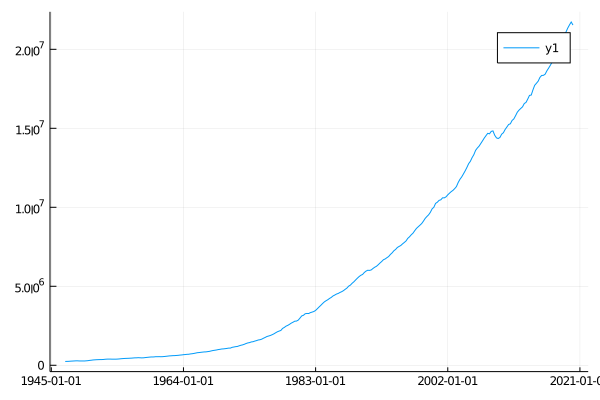

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [19]:
using Plots

In [ ]:
plot(dates, values)

In [20]:
using QuantEcon

┌ Info: Precompiling QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1260


In [21]:
?hp_filter

search: hp_filter



apply Hodrick-Prescott filter to `AbstractVector`.

##### Arguments

  * `y::AbstractVector` : data to be detrended
  * `λ::Real` : penalty on variation in trend

##### Returns

  * `y_cyclical::Vector`: cyclical component
  * `y_trend::Vector`: trend component


In [22]:
cyc, trend = hp_filter(values, 1600)

([4520.900784823869, 2232.6559405195294, 754.5855332246283, 5812.468589985772, 6695.612521891191, 8386.691947160463, 9849.19672618655, 5802.375036895915, -4820.680690739071, -13896.50451114407  …  -29727.709084484726, 10484.980902142823, 152263.3248687759, 185875.6450922005, 127627.09927116707, 122280.67282625288, 157471.58424101025, 153728.62657848, 134544.1731615588, -265275.4830784425], [238643.09921517613, 243735.34405948047, 248830.41446677537, 253932.53141001423, 259046.3874781088, 264180.30805283954, 269346.80327381345, 274563.6249631041, 279854.6806907391, 285247.50451114407  …  1.9948637709084485e7, 2.0152674019097857e7, 2.0357913675131224e7, 2.05638763549078e7, 2.0770176900728833e7, 2.0976546327173747e7, 2.118279541575899e7, 2.138881137342152e7, 2.159457982683844e7, 2.1800182483078443e7])

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /home/pablo/.julia/packages/Plots/NVH6y/src/args.jl:1162


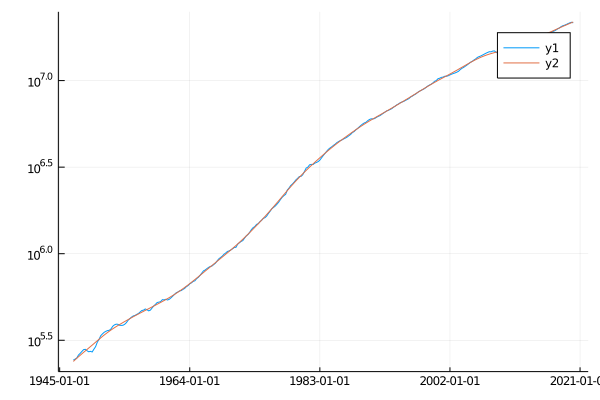

In [25]:
pl = plot(dates, values)
plot!(pl, dates, trend, yscale=:log)

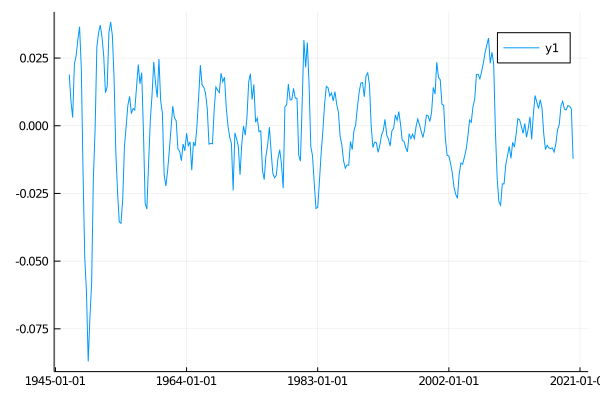

In [68]:
gdp_cyclical = cyc./trend
plot(dates, gdp_cyclical)

__Use Dolo.jl and the `rbc_iid.yaml` model to solve the RBC model. Use development version of Dolo (`dev Dolo`). Plot decision rule. Simulate the model and compare the moments to the data.__

In [32]:
using Dolo

┌ Info: Precompiling Dolo [9d24351c-2990-5e1b-a277-04c4b809c898]
└ @ Base loading.jl:1260


In [33]:
model = Model("rbc_iid.yaml")

name,Real Business Cycle
filename,rbc_iid.yaml
Type,Equation
expectation,\[m_{t} = \frac{\beta}{\left(c_{t+1}\right)^{\sigma}} \left(1-\delta\right)+rk_{t+1}\]
value,\[V_{t} = \left(\frac{\left(c_{t}\right)^{\left(1-\sigma\right)}}{\left(1-\sigma\right)}-\frac{\chi \left(n_{t}\right)^{1+\eta}}{1+\eta}\right)+\beta V_{t+1}\]
transition,"\[z_{t} = \rho z_{t-1}+e_{z,t}\]"
,\[k_{t} = \left(1-\delta\right) k_{t-1}+i_{t-1}\]
direct_response,\[n_{t} = \left(\frac{\left(1-\alpha\right) \text{exp}\left(z_{t}\right) \left(k_{t}\right)^{\alpha} m_{t}}{\chi}\right)^{\frac{1}{\eta+\alpha}}\]
,\[i_{t} = \left(\text{exp}\left(z_{t}\right) \left(k_{t}\right)^{\alpha} \left(n_{t}\right)^{\left(1-\alpha\right)}-\left(m_{t}\right)^{\frac{-1}{\sigma}}\right)\]
felicity,\[u_{t} = \left(\frac{\left(c_{t}\right)^{\left(1-\sigma\right)}}{\left(1-\sigma\right)}-\frac{\chi \left(n_{t}\right)^{1+\eta}}{1+\eta}\right)\]
arbitrage,\[\left(\chi \left(n_{t}\right)^{\eta} \left(c_{t}\right)^{\sigma}-w_{t}\right)\]


In [38]:
sol = time_iteration(model)

------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     1.19e+00        1.76e-01        NaN             6.26e+07        8    
2     1.28e-01        4.73e-02        2.69e-01        3.41e+07        5    
3     7.77e-02        3.50e-02        7.40e-01        6.24e+07        5    
4     5.21e-02        2.62e-02        7.49e-01        3.93e+07        5    
5     3.70e-02        1.99e-02        7.59e-01        2.39e+07        4    
6     2.72e-02        1.53e-02        7.69e-01        2.00e+07        4    
7     2.06e-02        1.19e-02        7.79e-01        1.27e+07        4    
8     1.59e-02        9.40e-03        7.89e-01        1.85e+07        4    
9     1.25e-02        7.50e-03        7.98e-01        2.16e+07        4    
10    9.94e-03        6.06e-03        8.08e-01        3.16e+07        4    
11    8.04e-03        4

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscretizedIIDProcess
 * Decision Rule type: Dolo.CubicDR{Dolo.EmptyGrid,Dolo.CartesianGrid{2},2,2}
 * Number of iterations: 77
 * Convergence: true
   * |x - x'| < 1.0e-07: true


$(n, i) = \varphi(k, z)$

In [41]:
tab = tabulate(model, sol.dr, :k)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, [:e_z, :z, :k, :n, :i, :w, :rk, :y, :c]
    :k, [8.419480461131387, 8.438379407172086, 8.457278353212786, 8.476177299253484, 8.495076245294182, 8.513975191334882, 8.53287413737558, 8.55177308341628, 8.57067202945698, 8.589570975497677  …  10.120385604794295, 10.139284550834994, 10.158183496875692, 10.177082442916392, 10.19598138895709, 10.21488033499779, 10.233779281038489, 10.252678227079187, 10.271577173119887, 10.290476119160585]
And data, a 9×100 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.0        0.0        0.0        …   0.0         0.0         0.0
 0.0        0.0        0.0            0.0         0.0         0.0
 8.41948    8.43838    8.45728       10.2527     10.2716     10.2905
 0.34526    0.344932   0.344604       0.316985    0.316727    0.316469
 0.243734   0.243535   0.243336       0.224283    0.224083    0.223883
 1.92234    1.92437    1.92639    …   2.11012     2.11198     2.11383
 0.0388267  0.0387438  0.

In [49]:
using AxisArrays

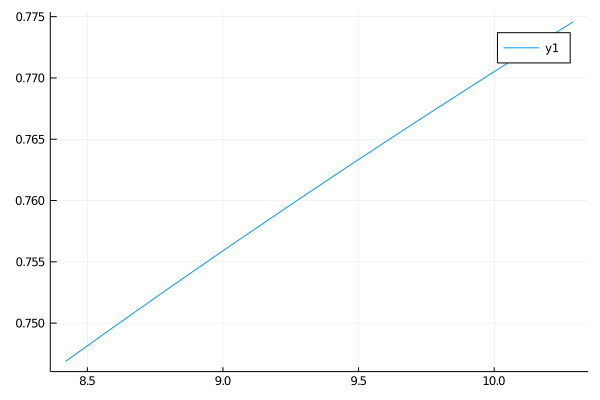

In [51]:
plot(tab[Axis{:V}(:k)], tab[Axis{:V}(:c)])

In [56]:
length(dates)

293

In [59]:
sim = simulate(model, sol.dr, T=293);

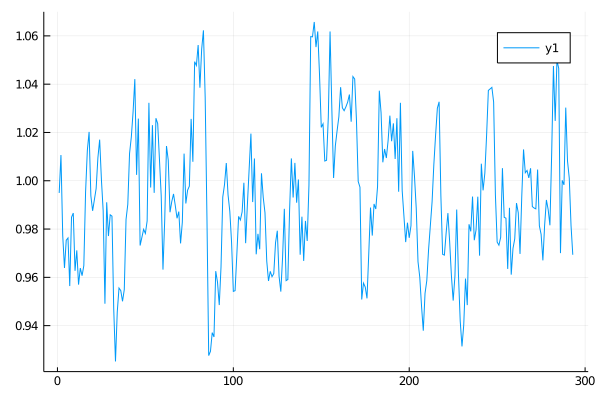

In [60]:
plot(sim[Axis{:N}(1), Axis{:V}(:y)])

In [61]:
gdp_simulated = sim[Axis{:N}(1), Axis{:V}(:y)]

1-dimensional AxisArray{Float64,1,...} with axes:
    :T, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  284, 285, 286, 287, 288, 289, 290, 291, 292, 293]
And data, a 293-element Array{Float64,1}:
 0.9949577097699052
 1.0106471733933329
 0.9774007130949695
 0.9638820143733619
 0.9753746853666072
 0.9763024831248664
 0.9564062882002061
 0.9848996634748327
 0.9866238887302661
 0.9626891840855152
 0.9711689678011171
 0.9569797036620823
 0.9638305012119174
 ⋮
 1.0475272282558985
 1.0247801694662908
 1.0498431394820793
 1.0465475599995968
 0.9700314510525458
 1.000176766090371
 0.9982824305727989
 1.0302971811896695
 1.0081997681942705
 1.0010550417140058
 0.9815179382073925
 0.9693490108134153

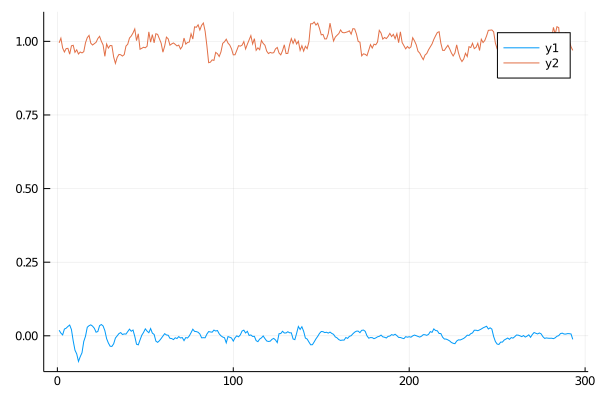

In [70]:
pl = plot( gdp_cyclical )
plot!(pl, gdp_simulated)

In [69]:
println("Standard deviation. Data: $(std(gdp_cyclical)). Model $(std(gdp_simulated))")

Standard deviation. Data: 0.017027639752671894. Model 0.028821371380569012


In [74]:
estimates = []
for i=1:20
    sim = simulate(model, sol.dr, T=293)
    gdp_sim = sim[Axis{:N}(1), Axis{:V}(:y)]
    
    push!(estimates, std(gdp_sim))
end

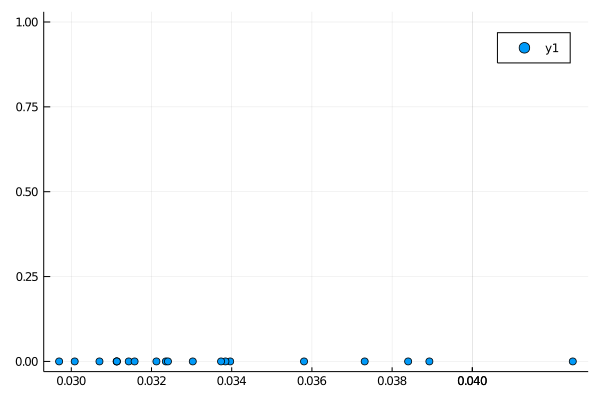

In [77]:
scatter(estimates, estimates*0)

In [78]:
model.calibration[:states]

2-element Array{Float64,1}:
 0.0
 9.354978290145986

In [89]:
sim = simulate(model, sol.dr; s0=[0.0, 5], N=100, T=200);

In [109]:
mean_y = mean( sim[Axis{:V}(:y)].data; dims=1 )[1,:]
std_y = std( sim[Axis{:V}(:y)].data; dims=1 )[1,:]
mean_k = mean( sim[Axis{:V}(:k)].data; dims=1 )[1,:];
std_k = std( sim[Axis{:V}(:k)].data; dims=1 )[1,:];

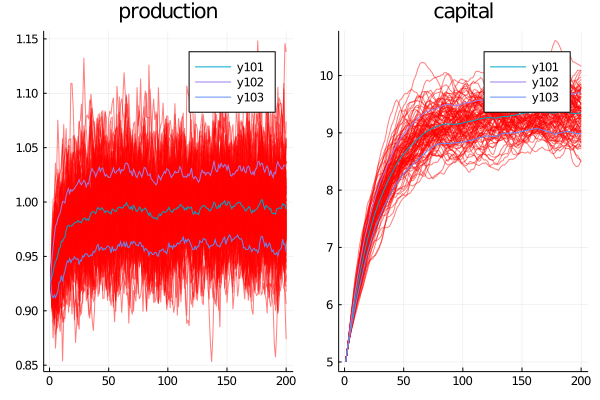

In [110]:
pl = plot(title="production")
for i=1:100
    plot!(pl, sim[Axis{:V}(:y), Axis{:N}(i) ], color="red", alpha=0.5, label="")
end

plot!(pl, mean_y )
plot!(pl, mean_y+std_y )
plot!(pl, mean_y-std_y )

pl2 = plot(title="capital")
for i=1:100
    plot!(pl2, sim[Axis{:V}(:k), Axis{:N}(i) ], color="red", alpha=0.5, label="")
end
plot!(pl2, mean_k )
plot!(pl2, mean_k+std_k )
plot!(pl2, mean_k-std_k )

plot(pl, pl2)

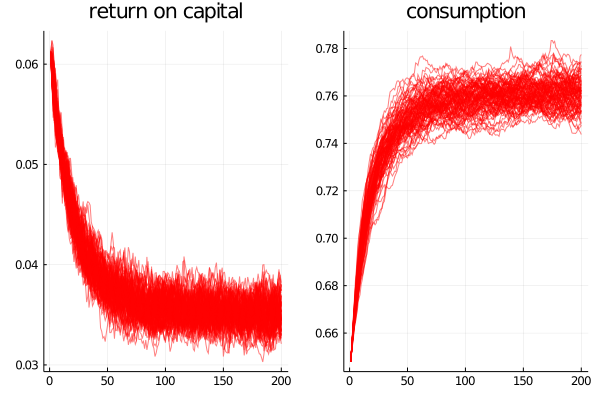

In [115]:

pl2 = plot(title="return on capital")
for i=1:100
    plot!(pl2, sim[Axis{:V}(:rk), Axis{:N}(i) ], color="red", alpha=0.5, label="")
end

pl3 = plot(title="consumption")
for i=1:100
    plot!(pl3, sim[Axis{:V}(:c), Axis{:N}(i) ], color="red", alpha=0.5, label="")
end

plot(pl2, pl3)

__Starting from the risky steady-state, compute the impulse response function for a tfp shock. Do you expect consumption to rise or diminish?__

In [133]:
irf = response(model, sol.dr, :e_z, -0.1, T=50)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, [:e_z, :z, :k, :n, :i, :w, :rk, :y, :c]
    :T, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
And data, a 9×50 Array{Float64,2}:
 0.0        -0.1         0.0         0.0        …   0.0          0.0
 0.0        -0.1        -0.08       -0.064         -2.78759e-6  -2.23007e-6
 9.35498     9.35485     9.23773     9.14815        9.22148      9.2261
 0.32995     0.315416    0.32019     0.323966       0.332013     0.331941
 0.233744    0.116755    0.141362    0.160931       0.235159     0.235111
 2.02037     1.85548     1.87579     1.89258    …   2.00667      2.00715
 0.0350975   0.0308136   0.0320232   0.0330111      0.0355853    0.0355682
 0.994958    0.873504    0.896429    0.915123       0.994391     0.994412
 0.761214    0.756749    0.755067    0.754191       0.759232     0.759301

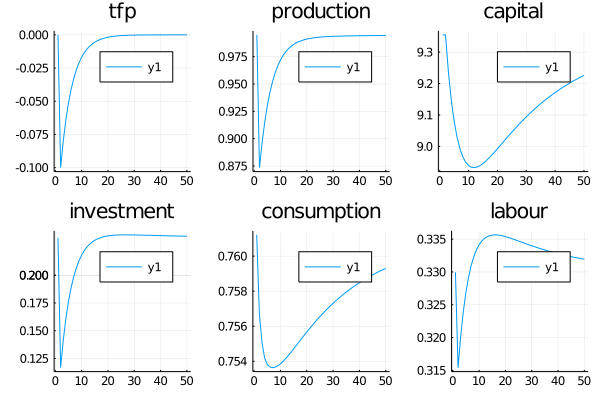

In [137]:
pl = plot( irf[Axis{:V}(:z)], title="tfp" )
pl2 = plot( irf[Axis{:V}(:y)], title="production")
pl3 = plot( irf[Axis{:V}(:k)], title="capital")
pl4 = plot( irf[Axis{:V}(:i)], title="investment")
pl5 = plot( irf[Axis{:V}(:c)], title="consumption")
pl6 = plot( irf[Axis{:V}(:n)], title="labour")
plot(pl, pl2, pl3, pl4,pl5, pl6)

## New Keynesian Model

We consider the following version of the New-Keynesian model.

Phillips Curve:

$$\pi_t = \beta E_t \left[ \pi_{t+1} \right] + \kappa y_t $$

IS Curve:

$$y_t = y_{t+1} + \frac{1}{\sigma}(i_t - E_t\left[ \pi_{t+1}\right] ) + \nu_t$$

Taylor Rule:

$$i_t = \pi_t + r^{\star}_t + \alpha_{\pi} \left( \pi_t - \pi_t^{\star} \right) + \alpha_y (y_t - y^{\star}_t)$$


Variables:

- $\pi_t$: inflation
- $y_t$: production (log-deviation)
- $i_t$: inflation

Meaning of the parameters:

- $\beta=0.01$: discount rate
- targeted values (all 0 here): $r^{\star}_t$, $\pi^{\star}_t$, $y_t^{\star}$
- $\kappa$: response of inflation to output (depends on price adjustment)
    - $\kappa = \frac{h(1-(1-h)\beta)}{1-h}$
    - $h$ is probability of price adjustment (flexibility)


__Suppose $\nu_t$ is i.i.d. Find matrices $P$ such that $\begin{bmatrix} \pi_t \\ y_t \end{bmatrix} = P \begin{bmatrix} \pi_{t+1} \\ y_{t+1} \end{bmatrix} + \begin{bmatrix} 0 \\ \nu_t\end{bmatrix}$. When is $\pi_t$ well defined ?__

In [157]:
using LinearAlgebra


function eigenvalue(α)
    β = 1.01
    σ = 1.0
    h = 0.25
    κ = h*(1-(1-h)*β)/(1-h)
    α_π = α
    α_y = 0.5

    P = [1 κ; -(1 + α_π)/σ 1-α_y/σ] \ [β 0 ; -1 1]
    evs = eigvals(P)
    λ = maximum(abs, evs)
    return λ
end

eigenvalue (generic function with 1 method)

In [158]:
rr = -0.1:0.01: 0.6
evals = [eigenvalue(u) for u in rr]

71-element Array{Float64,1}:
 1.7757451010454768
 1.7700542011053324
 1.7643529123200679
 1.758640611249587
 1.752916649371036
 1.7471803515104278
 1.7414310141481626
 1.7356679035858364
 1.7298902539602172
 1.7240972650885436
 1.718288100127318
 1.7124618830245
 1.7066176957424088
 ⋮
 1.351331288964173
 1.3333333333333337
 1.308307030887879
 1.2733950050619942
 1.2725695259515555
 1.2717456501146356
 1.2709233723680589
 1.2701026875520767
 1.2692835905302362
 1.2684660761892403
 1.2676501394388164
 1.2668357752115829

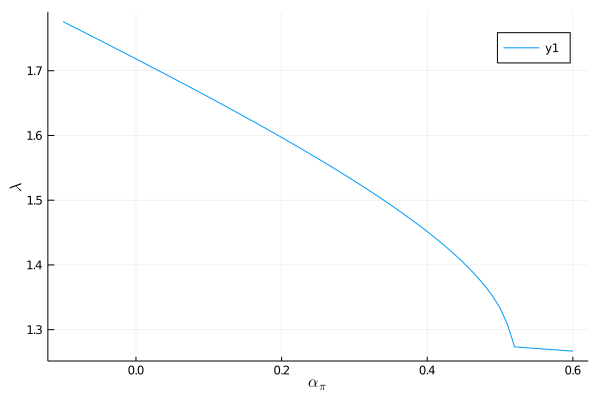

In [159]:
plot(rr, evals, xlabel="\$\\alpha_\\pi\$", ylabel="\$\\lambda\$")

__Now suppose $\nu_t$ is an autocorrelated process $\nu_t = \rho \nu_{t-1} + \epsilon_t$. Now inflation and output depend on a state, that is $\pi_t=\pi(\nu_t)$ and $y_t=y(\nu_t)$ where $\pi(x)=\pi_1 x$ and $y(x) = y_1 x$ are both linear functions. Write does the conditions, which $\pi_1$ and $y_1$ must satisfy. When are these values well determined?__